In [2]:
import PIL

In [4]:
# The conversion should work equally with a bitmap
original_crosshair = PIL.Image.open("crosshair.bmp")

In [5]:
original_crosshair.size

(604, 684)

In [6]:
original_crosshair_arr = np.asarray(original_crosshair)
print(original_crosshair_arr.shape)

fig, ax = plt.subplots()
ax.imshow(original_crosshair_arr)

(684, 604)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
np.sum(original_crosshair_arr[(original_crosshair_arr.shape[0] // 2) + 10,
                       (original_crosshair_arr.shape[1] // 2)-10:(original_crosshair_arr.shape[1] // 2)+10] == 255)

4

In [29]:
np.sum(original_crosshair_arr[(original_crosshair_arr.shape[0] // 2)-10:(original_crosshair_arr.shape[0] // 2)+10,
                              (original_crosshair_arr.shape[1] // 2) + 10] == 255)

4

In [30]:
np.sum(original_crosshair_arr[0:100, 10] == 255)

4

In [31]:
np.sum(original_crosshair_arr[10, 0:100] == 255)

4

## Draw new crosshair

In [6]:
line_width = 4
im_width = 912
im_height = 1140
crosshair_width = original_crosshair.size[0]
crosshair_height = original_crosshair.size[1]
color = 255

In [7]:
new_crosshair = PIL.Image.new( 'L', (crosshair_width, crosshair_height), 0) # Create a new black image

In [8]:
new_crosshair_pixels = new_crosshair.load() # Create the pixel map
new_crosshair_arr = np.array(new_crosshair)

## Draw cross

In [9]:
ax0_start = np.int((new_crosshair_arr.shape[0] // 2) - line_width/2)
ax0_end = np.int((new_crosshair_arr.shape[0] // 2) + line_width/2)

new_crosshair_arr[ax0_start:ax0_end, :] = color

In [11]:
from skimage.measure import label
ax0_labeled_whitespace = label(np.logical_not(new_crosshair_arr[:,0]))

for label_ in np.unique(ax0_labeled_whitespace):
    print(f"Label {label_}: {np.sum(ax0_labeled_whitespace == label_)} pixels")

Label 0: 4 pixels
Label 1: 340 pixels
Label 2: 340 pixels


In [12]:
ax1_start = np.int((new_crosshair_arr.shape[1] // 2) - line_width/2)
ax1_end = np.int((new_crosshair_arr.shape[1] // 2) + line_width/2)

new_crosshair_arr[:, ax1_start:ax1_end] = color

In [13]:
from skimage.measure import label
ax1_labeled_whitespace = label(np.logical_not(new_crosshair_arr[0,:]))

for label_ in np.unique(ax1_labeled_whitespace):
    print(f"Label {label_}: {np.sum(ax1_labeled_whitespace == label_)} pixels")

Label 0: 4 pixels
Label 1: 300 pixels
Label 2: 300 pixels


## Draw window

In [14]:
new_crosshair_arr[:line_width, :] = color
new_crosshair_arr[-line_width:, :] = color
new_crosshair_arr[:, :line_width] = color
new_crosshair_arr[:, -line_width:] = color

## Convert back to PIL image

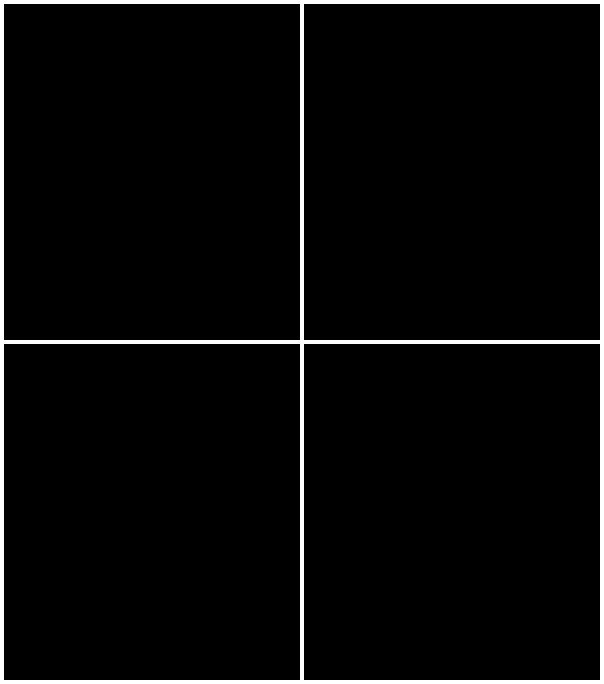

In [15]:
new_crosshair = PIL.Image.fromarray(np.uint8(new_crosshair_arr))
new_crosshair

In [19]:
height_extra//2

228

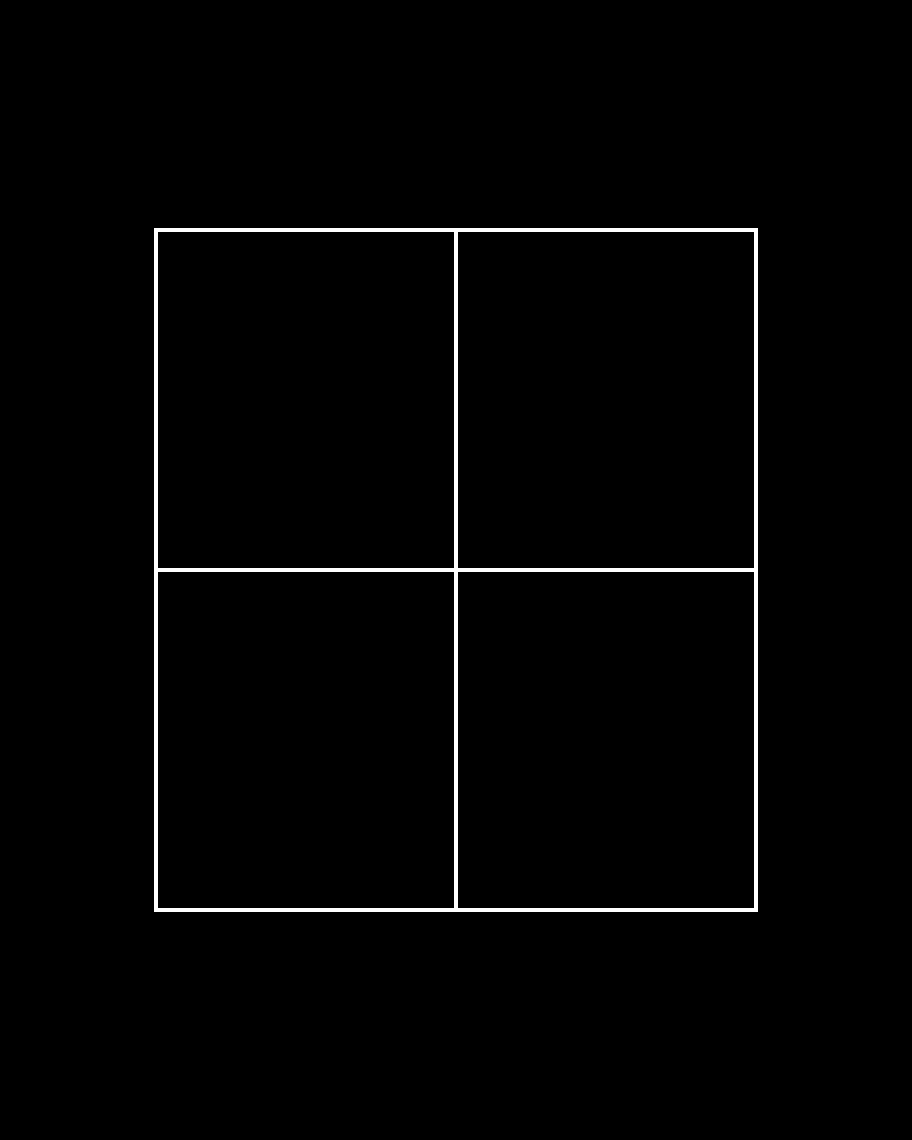

In [20]:
if (crosshair_width !=im_width) or (crosshair_height !=im_height):
    
    from analysis_toolbox.image_helper import add_margin
    from analysis_toolbox.utils import check_even
    
    width_extra = im_width - crosshair_width
    height_extra = im_height - crosshair_height
    
    if check_even(width_extra) and check_even(height_extra):
        new_crosshair = add_margin(new_crosshair, height_extra//2, width_extra//2, height_extra//2, width_extra//2, 0)
        display(new_crosshair)
    else:
        import warnings
        warnings.warn("width or height not even")
        
    

In [21]:
from analysis_toolbox.utils import now_str
new_crosshair.save(f'crosshair_{now_str()}.bmp')